In [6]:
import numpy as np
import scipy.stats as sc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [10]:
review_fields = ['stars']
review_chunks = pd.read_csv("yelp_review.csv",usecols=review_fields,chunksize=100000)
means = []
for r in review_chunks:
    means.append(np.mean(r['stars']))
    del r
np.mean(means)

53


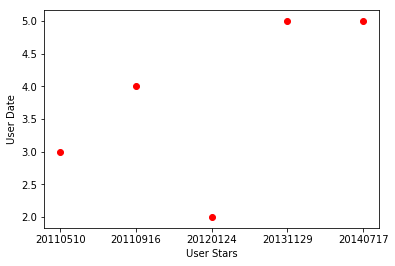

4089    20131129
956     20110510
4951    20120124
4781    20140717
2580    20110916
Name: date, dtype: object


In [142]:
rows = np.random.choice(business_df.index.values, 1000)
rows_users = np.random.choice(user_sample_1.index.values, )
sampled_business_df = business_df.iloc[rows]
sampled_user_df = user_sample_1.iloc[rows_users]

lats = sampled_business_df['latitude']
longs = sampled_business_df['longitude']
business_stars = sampled_business_df['stars']
user_stars = sampled_user_df['stars']
user_date = sampled_user_df['date'].apply(lambda x: x.replace("-",""))
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(user_date, user_stars, c='r', marker='o')

ax.set_xlabel('User Stars')
ax.set_ylabel('User Date')

plt.show( )

X = []
for item in zip(user_date,user_stars):
    X.append([item[0], item[1]])
print(user_date)

20122679.2


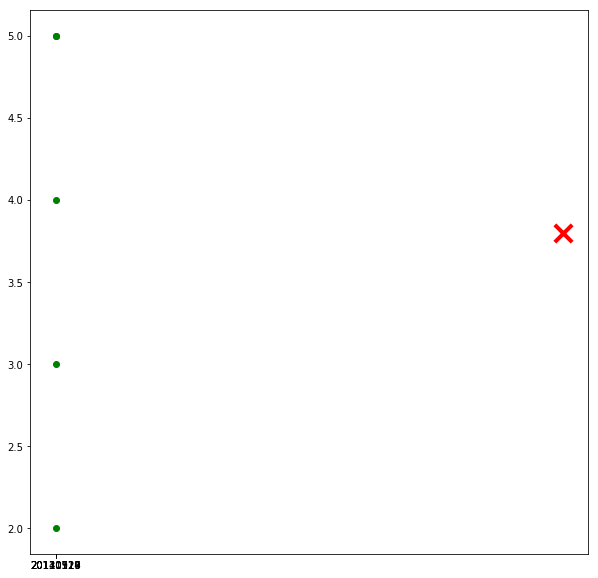

In [159]:
plt.figure(figsize=(10,10))
k_means = KMeans(n_clusters=1)
k_means.fit(X)
centroids = k_means.cluster_centers_
print(centroids[0][0]/1)
plt.scatter(user_date, user_stars, c="green")
plt.scatter(centroids[:,0], centroids[:,1], 
            marker="x", s=300,c="red",linewidth=4)
plt.show()

## This code will replace the string of categories with the first in the list.

item_types = []
i = 0
for row in business_df.iterrows():
    typ = row[1]['categories']
    type_set = typ.split(";")[0]
    business_df.categories[business_df.categories == typ] = type_set

In [ ]:
plt.figure(figsize=(30,10))
plt.hist(business_df['categories'].head(350))
plt.show()

In [ ]:
print(business_df['categories'])

# Data Cleaning
### Drop missing values
We're going to drop the missing values that we don't need

In [102]:
business_df = business_df.dropna()
#reviews = [chunk for chunks in review_chunks]

# Chunk Information
There are 18 Chunks of (approximate) size 10,000 for Business Hours

There are 526 chunks of (approximate) size 10,000 for Review Chunks (Before Cleaning)

In [97]:
count = 0
for i in review_chunks:
    count += 1
print("Chunks: ",count)

Chunks:  526


In [67]:
#plt.scatter(business_df['review_count'],business_df['stars'])

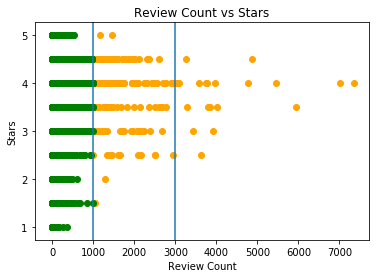

1199.2153846153851


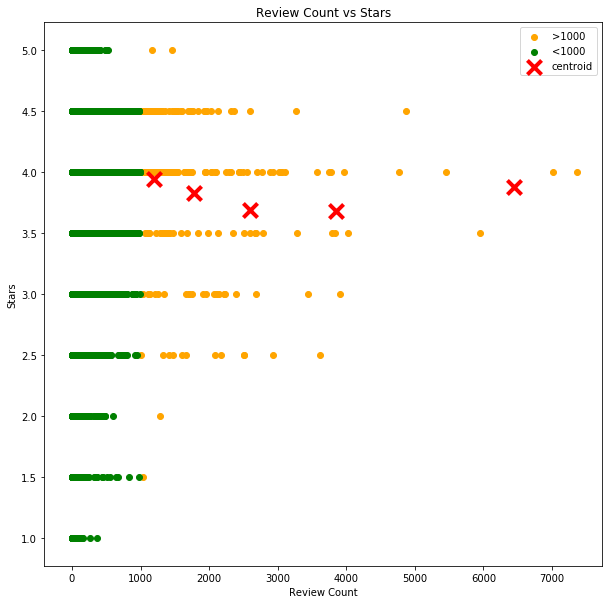

In [180]:
business_mod_1 = business_df[business_df.review_count > 1000]
business_mod_2 = business_df[business_df.review_count < 1000]
Z = []
for i in range(len(business_mod_1)):
    Z.append([business_mod_1['review_count'].iloc[i], business_mod_1['stars'].iloc[i]])
z = zip(business_mod_1['review_count'], business_mod_1['stars'])
plt.scatter(business_mod_1['review_count'], business_mod_1['stars'],color="orange")
plt.scatter(business_mod_2['review_count'], business_mod_2['stars'],color="green")
plt.title("Review Count vs Stars")
plt.axvline(1000)
plt.axvline(3000)
plt.xlabel("Review Count")
plt.ylabel("Stars")
plt.show()

plt.figure(figsize=(10,10))
k_means = KMeans(n_clusters=5)
k_means.fit(Z)
centroids = k_means.cluster_centers_
print(centroids[0][0]/1)
plt.scatter(business_mod_1['review_count'], business_mod_1['stars'],color="orange")
plt.scatter(business_mod_2['review_count'], business_mod_2['stars'],color="green")
plt.scatter(centroids[:,0], centroids[:,1], 
            marker="x", s=200,c="red",linewidth=4)
plt.title("Review Count vs Stars")
plt.xlabel("Review Count")
plt.ylabel("Stars")
plt.legend(['>1000','<1000','centroid'])
plt.show()

Interesting note -> The majority of businesses with more than 3,000 reviews Have a 2.5 rating or above

In [164]:
business_mod = business_df[business_df.review_count > 1000]